## Decision Tree Classification

In [77]:
# let's import the libraries we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [78]:
# let's import the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')

# preview the dataset
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [79]:
# lets split the dataset into x and why for dependent and independent variables
x = dataset.drop(['Purchased'], axis=1) #independent variable
y = dataset['Purchased']  #dependent variable

In [80]:
# let's split the data into training and test sets
# importing the train_test_split
from sklearn.model_selection import train_test_split

# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [81]:
# lets scale some feature; age and estimated salary
# scaling increases accuracy
# lets import standard scaler
from sklearn.preprocessing import StandardScaler

# assign the standard scaler to an object
sc = StandardScaler()

# lets fit transform on the x_train then transform it using sc.fit_transform(x)
x_train = sc.fit_transform(x_train)
X_test= sc.transform(x_test)

In [82]:
# TRAINING THE MODEL

# let's import decision tree classifier
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = "entropy", random_state = 0)
# fit the model to training set
model = classifier.fit(x_train, y_train)

# printing the model
print(model)

DecisionTreeClassifier(criterion='entropy', random_state=0)


In [83]:
# lets predict the new result and reverse the scaling
print(classifier.predict(sc.transform([[30,87000]])))

[0]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [84]:
# predicting the test set results
y_pred = classifier.predict(x_test)

# display 2 vectors; predicted profits and actual profits
print(np.concatenate((y_pred.reshape(len(y_pred), 1), 
                      y_test.values.reshape(len(y_test), 1)), 1))

[[1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [85]:
# build a confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_pred, y_test)
print(cm)

[[ 0  0]
 [68 32]]


In [86]:
# compute accuracy
accuracy_score(y_test, y_pred)

0.32

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


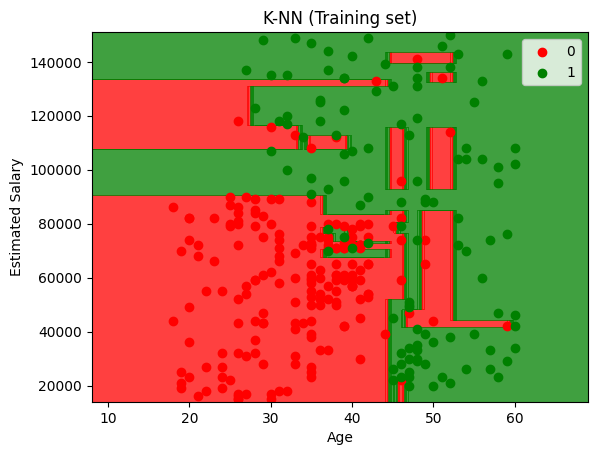

In [87]:
# visualise training set results
from matplotlib.colors import ListedColormap
x_set, y_set = sc.inverse_transform(x_train), y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 10, stop = x_set[:, 0].max() + 10, step = 1),
                     np.arange(start = x_set[:, 1].min() - 1000, stop = x_set[:, 1].max() + 1000, step = 1))
plt.contourf(x1, x2, classifier.predict(sc.transform(np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [88]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
x_set, y_set = sc.inverse_transform(x_test), y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 10, stop = x_set[:, 0].max() + 10, step = 1),
                     np.arange(start = x_set[:, 1].min() - 1000, stop = x_set[:, 1].max() + 1000, step = 1))
plt.contourf(x1, x2, classifier.predict(sc.transform(np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()